### Bibliotecas importadas

In [5]:
import matplotlib.pyplot as plt
from datetime import datetime
import statistics

### Parte 1 - Definindo funções

In [69]:
#-------------------------------------------------------------------------------
# Função para carregar dados
#-------------------------------------------------------------------------------

def carrega_dados(arquivo):
  with open(arquivo) as csv:
    csv.readline()
    dados_processo = []
    for linha in csv:
      valores = linha.split(';')

  #Excluindo linhas com precipitação negativa
      valor1 = float(valores[1])
      if valor1 < 0: continue

      tupla = (datetime.strptime(valores[0], '%d/%m/%Y').date(),
              float(valores[1]),
              float(valores[2]),
              float(valores[3]),
              float(valores[4]),
              round(float(valores[5]),2),
              round(float(valores[6]),2),
              round(float(valores[7]),2))
      dados_processo.append(tupla)
    return dados_processo

dados = carrega_dados('/content/dados_meteorológicos.csv')



#-------------------------------------------------------------------------------
# Função: Cabeçalho
#-------------------------------------------------------------------------------

def cabecalho():
  with open('/content/dados_meteorológicos.csv') as csv:
    cabeca = csv.readline().split(';')
    cabeca[0] = 'Data(Ano/mês/dia)'
    cabeca[1] = 'Precipitação'
    cabeca[2] = 'Temperatura Máxima'
    cabeca[3] = 'Temperatura Mínima'
    cabeca[4] = 'Horas insol'
    cabeca[5] = 'Temperatura média'
    cabeca[6] = 'Umidade relativa'
    cabeca[7] = 'Velocidade do vento'
  return cabeca



#-------------------------------------------------------------------------------
# Função para decobrir o dia de maior Precipitação
#-------------------------------------------------------------------------------

def maiorPrec(dados):
  auxAno_mes = []
  auxPrec = 0
  resultado = {}
  for linha in dados:
    if linha[1] > auxPrec:
      auxPrec = linha[1]
      auxAno_mes = linha[0]
  resultado[auxAno_mes] = auxPrec
  return resultado



#-------------------------------------------------------------------------------
# Função: nº de dias do mês
#-------------------------------------------------------------------------------

def diasMes(mes):
  dias = 0
  if mes == 2: dias = 28
  if mes == 4 or mes == 6 or mes == 9 or mes == 11: dias = 30
  if mes == 1 or mes == 3 or mes == 5 or mes == 7 or mes == 8 or mes == 10 or mes == 12: dias = 31
  return dias



#-------------------------------------------------------------------------------
# Função para decobrir a média mínima do mês escolhido
#-------------------------------------------------------------------------------

def mediaMinima(mes):
  dias = diasMes(mes)
  media_mes = []
  mes_contagem = []
  ano = 2006
  resultado = {}
  contador = 0
  for linha in dados:
      if linha[0].year == ano:
        if linha[0].month == mes:
          mes_contagem.append(linha[3])
          if len(mes_contagem) == dias:
            media_mes.append(round(sum(mes_contagem)/dias,2))
            resultado[ano] = media_mes[contador]
            ano += 1
            contador += 1
            mes_contagem = []
          if ano > 2016: break
  return(resultado)

### PARTE 2 - Visualização de dados em determinados períodos


In [73]:
#-------------------------------------------------------------------------------
# Carregando dados de arquivo escolhido + tratamento dos dados
#-------------------------------------------------------------------------------

dados = carrega_dados('/content/dados_meteorológicos.csv')



#-------------------------------------------------------------------------------
# Inputs do usuário + validação dos inputs
#-------------------------------------------------------------------------------

print('-'*103)
print('A seguir, digite o período que deseja acessar as informações meteorologicos e os dados que quer acessar')
print('-'*103)
print( )

#INPUT + VALIDAÇÃO MÊS INICIAL
mes_inicial = int(input('Digite o mês inicial (em forma númerica) de sua pesquisa: '))
while mes_inicial not in range(1, 12+1):
  mes_inicial = int(input('Você digitou um mês inválido, por gentileza, digite novamente: '))

print()

#INPUT + VALIDAÇÃO ANO INICIAL
ano_inicial = int(input('Digite o ano inicial (em forma númerica) de sua pesquisa\nAnos válidos: de 1961 até 2016: '))
while ano_inicial not in range(1961, 2016+1,1):
  ano_inicial = int(input('Você digitou um ano inválido, por gentileza, digite novamente: '))

print()

#INPUT + VALIDAÇÃO MÊS FINAL
mes_final = int(input('Digite o mês final (em forma númerica) de sua pesquisa: '))
while mes_final not in range(1, 12+1):
  mes_final = int(input('Você digitou um mês inválido, por gentileza, digite novamente: '))

print()

#INPUT + VALIDAÇÃO ANO FINAL
ano_final = int(input('Digite o ano final (em forma númerica) de sua pesquisa\nAnos válidos: de 1961 até 2016: '))

requisito1 = False
requisito2 = False
requisito3 = False

if ano_final < ano_inicial:
  requisito1 = True
if ano_final not in range(1961, 2016+1,1):
  requisito2 = True
if ano_final == ano_inicial:
  if mes_final < mes_inicial:
    requisito3 = True
requisitos = [requisito1, requisito2, requisito3]

while True in requisitos:
  if requisito1 == True:
    ano_final = int(input(f'''Você digitou um ano final menor do que o ano incial,
     por gentileza, digite novamente um anos maior ou igual que {ano_inicial}: '''))
  if ano_final < ano_inicial:
    requisito1 = True
  if ano_final >= ano_inicial: requisito1 = False

  if requisito2 == True:
    ano_final = int(input('Você digitou um ano inválido, por gentileza, digite novamente: '))
  if ano_final not in range(1961, 2016+1,1):
    requisito2 = True
  if ano_final in range(1961, 2016+1): requisito2 = False

  if ano_final == ano_inicial:
      if mes_final < mes_inicial:
        requisito3 = True
  if requisito3 == True:
    mes_inicial = int(input('''Você escolheu dois anos iguais com o mês inicial
    maior do que o final, nestes casos o mês inicial precisa ser menor do que o
    final, por gentileza, digite novamente o MÊS INICIAL: '''))
    mes_final = int(input('Agora digite novamente o MÊS FINAL: '))
  if mes_final >= mes_inicial:
    requisito3 = False

  requisitos = [requisito1, requisito2, requisito3]

  if True not in requisitos: break

print()
print('-'*103)
print()

visualizar = int(input('''O que você deseja visualizar\n
1 - Todos os dados do período selecionado\n
2 - Apenas dados de precipitação do período selecionado\n
3 - Apenas dados de temperatura do período selecionado\n
4 - Apenas os dados de umidade e vento do período selecionado: '''))
while visualizar not in range(1, 4+1):
  visualizar = int(input('Você digitou um número inválido, por gentileza, digite novamente: '))

print()
print('-' * 103)
print('-' * 103)
print()



#-------------------------------------------------------------------------------
# Outputs dos dados
#-------------------------------------------------------------------------------

dados_exibidos = []

#OPÇÃO DE VISUALIZAÇÃO 1
if visualizar == 1:
  for linhas in dados:
    if linhas[0].year in range(ano_inicial, ano_final + 1):
      if linhas[0].month in range(mes_inicial, mes_final + 1):
        dados_exibidos.append(linhas)
  dados_exibidos.insert(0, cabecalho())

#OPÇÃO DE VISUALIZAÇÃO 2
if visualizar == 2:
  for linhas in dados:
    if linhas[0].year in range(ano_inicial, ano_final + 1):
      if linhas[0].month in range(mes_inicial, mes_final + 1):
        temp2 = (linhas[0], linhas[1])
        dados_exibidos.append(temp2)
  dados_exibidos.insert(0, cabecalho()[0] + ' , ' + cabecalho()[1])

#OPÇÃO DE VISUALIZAÇÃO 3
if visualizar == 3:
  for linhas in dados:
    if linhas[0].year in range(ano_inicial, ano_final + 1):
      if linhas[0].month in range(mes_inicial, mes_final + 1):
        temp3 = (linhas[0], linhas[2], linhas[3], linhas[5])
        dados_exibidos.append(temp3)
  dados_exibidos.insert(0, cabecalho()[0] + ' , ' + cabecalho()[2] + ' , ' + cabecalho()[3] + ' , ' + cabecalho()[5])

#OPÇÃO DE VISUALIZAÇÃO 4
if visualizar == 4:
  for linhas in dados:
    if linhas[0].year in range(ano_inicial, ano_final + 1):
      if linhas[0].month in range(mes_inicial, mes_final + 1):
        temp4 = (linhas[0], linhas[6], linhas[7])
        dados_exibidos.append(temp4)
  dados_exibidos.insert(0, cabecalho()[0] + ' , ' + cabecalho()[6] + ' , ' + cabecalho()[7])



#-------------------------------------------------------------------------------
# Apresentação dos dados no período desejado
#-------------------------------------------------------------------------------

#OPÇÃO DE VISUALIZAÇÃO 1
if visualizar == 1:
  print(f'A seguir, os dados meteorologicos do seguinte período: A partir de {ano_inicial}/{mes_inicial} até {ano_final}/{mes_final}')
  print(f' ')
  print('As colunas contém, respectivamente: Data, Precipitação, Temperatura Máxima,\nTemperatura Mínima, Horas insol, Temperatura Média, Umidade relativa e Velocidade do vento')
  print()
  print('-'*103)
  print()
  for dados in dados_exibidos:
    print(dados)

#OPÇÃO DE VISUALIZAÇÃO 2
if visualizar == 2:
  print(f'A seguir, os dados meteorologicos do seguinte período:: A partir de {ano_inicial}/{mes_inicial} até {ano_final}/{mes_final}')
  print(f' ')
  print('As colunas contém, respectivamente: Data e Precipitação')
  print()
  print('-'*103)
  print()
  for dados in dados_exibidos:
    print(dados)

#OPÇÃO DE VISUALIZAÇÃO 3
if visualizar == 3:
  print(f'A seguir, os dados meteorologicos do seguinte período:: A partir de {ano_inicial}/{mes_inicial} até {ano_final}/{mes_final}')
  print(f' ')
  print('As colunas contém, respectivamente: Data, Temperatura Máxima, Temperatura Mínima e Temperatura Média')
  print()
  print('-'*103)
  print()
  for dados in dados_exibidos:
    print(dados)

#OPÇÃO DE VISUALIZAÇÃO 4
if visualizar == 4:
  print(f'A seguir, os dados meteorologicos do seguinte período:: A partir de {ano_inicial}/{mes_inicial} até {ano_final}/{mes_final}')
  print()
  print('As colunas contém, respectivamente: Data, Umidade relativa, Velocidade do vento')
  print()
  print('-'*103)
  print()
  for dados in dados_exibidos:
    print(dados)

-------------------------------------------------------------------------------------------------------
A seguir, digite o período que deseja acessar as informações meteorologicos e os dados que quer acessar
-------------------------------------------------------------------------------------------------------

Digite o mês inicial (em forma númerica) de sua pesquisa: 1

Digite o ano inicial (em forma númerica) de sua pesquisa
Anos válidos: de 1961 até 2016: 2000

Digite o mês final (em forma númerica) de sua pesquisa: 2

Digite o ano final (em forma númerica) de sua pesquisa
Anos válidos: de 1961 até 2016: 2000

-------------------------------------------------------------------------------------------------------

O que você deseja visualizar

1 - Todos os dados do período selecionado

2 - Apenas dados de precipitação do período selecionado

3 - Apenas dados de temperatura do período selecionado

4 - Apenas os dados de umidade e vento do período selecionado: 3

----------------------

### PARTE 3 - Dia com maior precipitação

In [74]:
#-------------------------------------------------------------------------------
# Carregando dados de arquivo escolhido + tratamento dos dados
#-------------------------------------------------------------------------------

dados = carrega_dados('/content/dados_meteorológicos.csv')



#-------------------------------------------------------------------------------
# Exibindo resultado
#-------------------------------------------------------------------------------

chuvoso_mais = maiorPrec(dados)

for chave, valor in chuvoso_mais.items():
  print(f'O dia com maior precipitação foi em: {chave}, fazendo um total de: {valor}')

O dia com maior precipitação foi em: 2008-05-03, fazendo um total de: 149.6


### PARTE 4 - Média de temperatura mínima e gráfico

Digite o mês inicial (em forma númerica) de sua pesquisa: 3

Médias mínimas de cada mês Nº 3 de 2006 até 2016
      
2006: 19.96
2007: 21.59
2008: 19.74
2009: 20.02
2010: 19.75
2011: 19.17
2012: 18.78
2013: 18.24
2014: 19.41
2015: 20.13
2016: 19.49

A média total é: 19.66
      


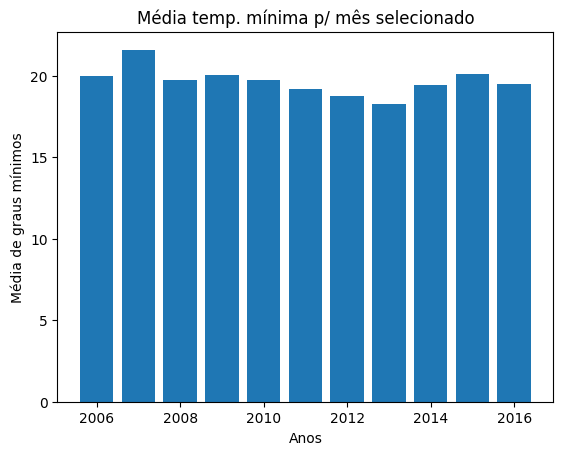

In [75]:
#-------------------------------------------------------------------------------
# Carregando dados de arquivo escolhido + tratamento dos dados
#-------------------------------------------------------------------------------

# Nesse caso, foi necessário abrir fora da função, pois a função retirava os dados
# de precipitação incorretos, porém aqui é do nosso interesse ter eles, visto que
# mesmo os dados de precipitação estando incorretos, os dados de temperatura mínima
# são válidos

with open('/content/dados_meteorológicos.csv') as csv:
  csv.readline()
  dados = []
  for linha in csv:
    valores = linha.split(';')
    tupla = (datetime.strptime(valores[0], '%d/%m/%Y').date(),
            float(valores[1]),
            float(valores[2]),
            float(valores[3]),
            float(valores[4]),
            round(float(valores[5]),2),
            round(float(valores[6]),2),
            round(float(valores[7]),2))
    dados.append(tupla)



#-------------------------------------------------------------------------------
# Inputs do usuário + validação dos inputs
#-------------------------------------------------------------------------------

mes = int(input('Digite o mês inicial (em forma númerica) de sua pesquisa: '))
while mes not in range(1, 12+1):
  mes = int(input('Você digitou um mês inválido, por gentileza, digite novamente: '))



#-------------------------------------------------------------------------------
# Exibindo resultado
#-------------------------------------------------------------------------------

medias_frias = mediaMinima(mes)
print(f'''
Médias mínimas de cada mês Nº {mes} de 2006 até 2016
      ''')
for chave, resultado in medias_frias.items():
  print(f'{chave}: {resultado}')

print(f'''
A média total é: {round(statistics.mean(medias_frias.values()),2)}
      ''')



#-------------------------------------------------------------------------------
# Gráfico
#-------------------------------------------------------------------------------
x = []
y = []

for chave, valor in medias_frias.items():
  x.append(chave)
  y.append(valor)

plt.bar(x, y)

plt.xlabel('Anos')
plt.ylabel('Média de graus mínimos')
plt.title('Média temp. mínima p/ mês selecionado')

plt.show()

#OBS: os meses de 7 em diante, só vão retornar até 2015, pois eles não tem registro após julho de 2016 e os de julho estão incompletos